# Trabajo practico integrador: Parte 1
## [Crimenes ocurridos en la ciudad de Chicago (2024)](https://data.cityofchicago.org/Public-Safety/Crimes-in-Chicago/ijzp-q8t2)

### Grupo: 9
### Alumno: Maxim Dorogov

## Objetivo
El objetivo de este trabajo es realizar un analisis exploratorio de datos (EDA) sobre un dataset de los crimenes ocurridos en la ciudad de Chicago en el año 2024. Se busca identificar las caracteristicas mas relevantes, patrones, tendencias para diferentes variables del dataset.

## Descripcion y analisis preliminar 

### <u>Columnas del dataset</u>

Esta informacion fue obtenida de la documentacion del dataset en [data.cityofchicago.org](https://data.cityofchicago.org/Public-Safety/Crimes-in-Chicago/ijzp-q8t2).

1. __ID__
    Unique identifier for the record.


1. __Case Number__
    The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.


1. __Date__
    Date when the incident occurred. this is sometimes a best estimate.


1. __Block__
    The partially redacted address where the incident occurred, placing it on the same block as the actual address.


1. __IUCR__
    The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.


1. __Primary Type__
    The primary description of the IUCR code.


1. __Description__
    The secondary description of the IUCR code, a subcategory of the primary description.


1. __Location Description__
    Description of the location where the incident occurred.


1. __Arrest__
    Indicates whether an arrest was made.


1. __Domestic__
    Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.


1. __Beat__
    Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.


1. __District__
    Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.


1. __Ward__
    The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.


1. __Community Area__
    Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.


1. __FBI Code:__ 
    Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).See the Chicago Police Department listing of these classifications at https://gis.chicagopolice.org/pages/crime_details.

1. __X Coordinate__
    The X coordinate of the location where the incident occurred, in the State Plane Coordinate System (SPCS) of Illinois East.

1. __Y Coordinate__
    The Y coordinate of the location where the incident occurred, in the State Plane Coordinate System (SPCS) of Illinois East.

1. __Year__
    The year when the incident occurred.

1. __Updated On__
    The date and time when the record was last updated.

1. __Latitude__
    Latitude of the location where the incident occurred.

1. __Longitude__
    Longitude of the location where the incident occurred.

1. __Location__
    The location of the incident in the form of a point geometry, which includes latitude and longitude coordinates.

En un análisis preliminar, basado en la descripcion provista, se descartan las siguientes columnas:
- __ID & Case Number__: Códigos únicos que identifican cada reporte y caso en el sistema (No estan catalogan el tipo de crimen ni estan relacionados con otras variables, solo son un identificador unico por caso).
- __Block__: Dirección censurada del crimen. (Dato incompleto)
- __Location__: Tupla de coordenadas de latitud y longitud. (No es necesaria, ya que existen columnas de latitud y longitud por separado)
- __Updated On__: Fecha de actualización del reporte. (No relacionada a la fecha del crimen) 
- __Year__: Año del crimen. (2024 para todos los casos)
- __X Coordinate__: Coordenadas X en el sistema de coordenadas del estado de Illinois. (No son necesarias, ya que existe una columna de latitud)
- __Y Coordinate__ Coordenadas Y en el sistema de coordenadas del estado de Illinois. (No son necesarias, ya que existe una columna de longitud)

Algo a tener en cuenta es que hay múltiples columnas que aportan información geográfica y es posible que no todas sean necesarias e incluso presenten informacion redundante para un modelo de machine learning. 

Como __target__ para un modelo de machine learning, se puede considerar la columna __Primary Type__, que indica el tipo de crimen la cual presenta 31 categorias diferentes. O tambien se puede considerar la columna __Arrest__, y trabajar el problema como un clasificadocion binaria, donde se busca predecir si se realizó un arresto o no.

## Analisis Exploratorio de datos (EDA)

In [270]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import numpy as np

In [271]:
CSV_PATH = 'Crimes_-_2024_20250701.csv'
df = pd.read_csv(CSV_PATH)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43.0,14,1186817.0,1860189.0,2024,05/17/2025 03:40:52 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38.0,26,1179661.0,1873623.0,2024,05/17/2025 03:40:52 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70.0,04B,1145740.0,1853048.0,2024,05/17/2025 03:40:52 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42.0,14,1184362.0,1861188.0,2024,05/17/2025 03:40:52 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25.0,08B,1137458.0,1907694.0,2024,05/17/2025 03:40:52 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


Inicialmente tenemos un dataset de 22 columnas y eliminamos las columnas que no aportan informacion relevante o son redundantes, mencionadas en la seccion anterior.

In [272]:
# eliminamos los datos que no aportan información relevante
df = df.drop(
    ['ID', 
     'Case Number', 
     'Block', 
     'Updated On', 
     'Year', 
     'Location', 
    ], axis=1)

df.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude
0,12/31/2024 11:58:00 PM,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,332,3,5,43.0,14,1186817.0,1860189.0,41.771470,-87.590742
1,12/31/2024 11:56:00 PM,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,223,2,3,38.0,26,1179661.0,1873623.0,41.808501,-87.616563
2,12/31/2024 11:55:00 PM,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,834,8,18,70.0,04B,1145740.0,1853048.0,41.752749,-87.741498
3,12/31/2024 11:53:00 PM,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,321,3,20,42.0,14,1184362.0,1861188.0,41.774269,-87.599710
4,12/31/2024 11:50:00 PM,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,25,29,25.0,08B,1137458.0,1907694.0,41.902858,-87.770537


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258378 entries, 0 to 258377
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  258378 non-null  object 
 1   IUCR                  258378 non-null  object 
 2   Primary Type          258378 non-null  object 
 3   Description           258378 non-null  object 
 4   Location Description  257325 non-null  object 
 5   Arrest                258378 non-null  bool   
 6   Domestic              258378 non-null  bool   
 7   Beat                  258378 non-null  int64  
 8   District              258378 non-null  int64  
 9   Ward                  258378 non-null  int64  
 10  Community Area        258376 non-null  float64
 11  FBI Code              258378 non-null  object 
 12  X Coordinate          257370 non-null  float64
 13  Y Coordinate          257370 non-null  float64
 14  Latitude              257370 non-null  float64
 15  

Pasamos a tener un dataset con 16 variables y un maximo de 258378 observaciones por cada variable. Podemos ver, ademas, que en algunas variables hay valores nulos o faltantes.


### Analisis y visualizacion de atributos faltantes

Imprimo la cantidad de valores nulos por columna:


In [274]:
print(df.isnull().sum())

Date                       0
IUCR                       0
Primary Type               0
Description                0
Location Description    1053
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             2
FBI Code                   0
X Coordinate            1008
Y Coordinate            1008
Latitude                1008
Longitude               1008
dtype: int64


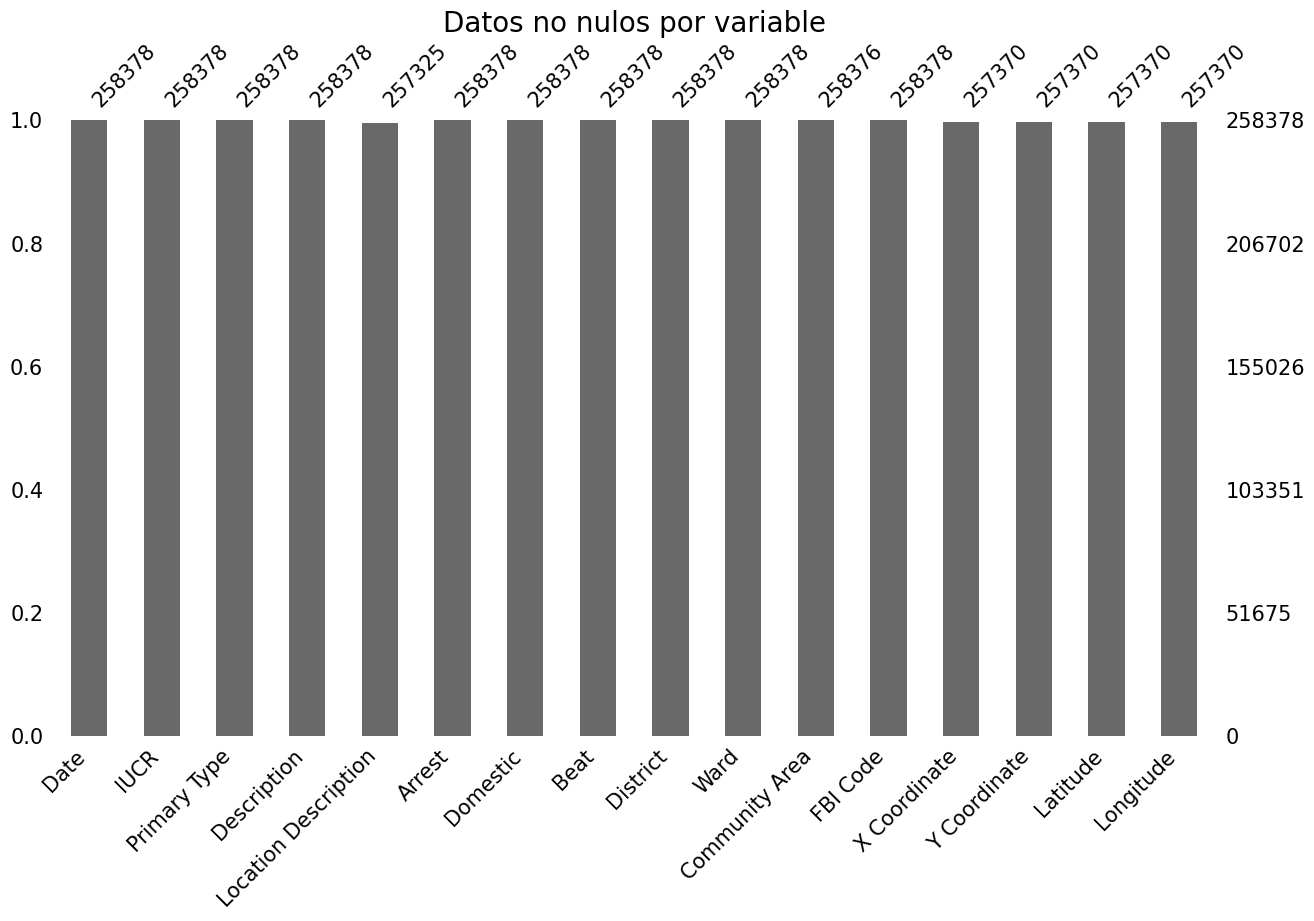

In [275]:
msno.bar(df, fontsize=15, figsize=(15,8))
plt.title("Datos no nulos por variable", fontsize=20)
plt.show()

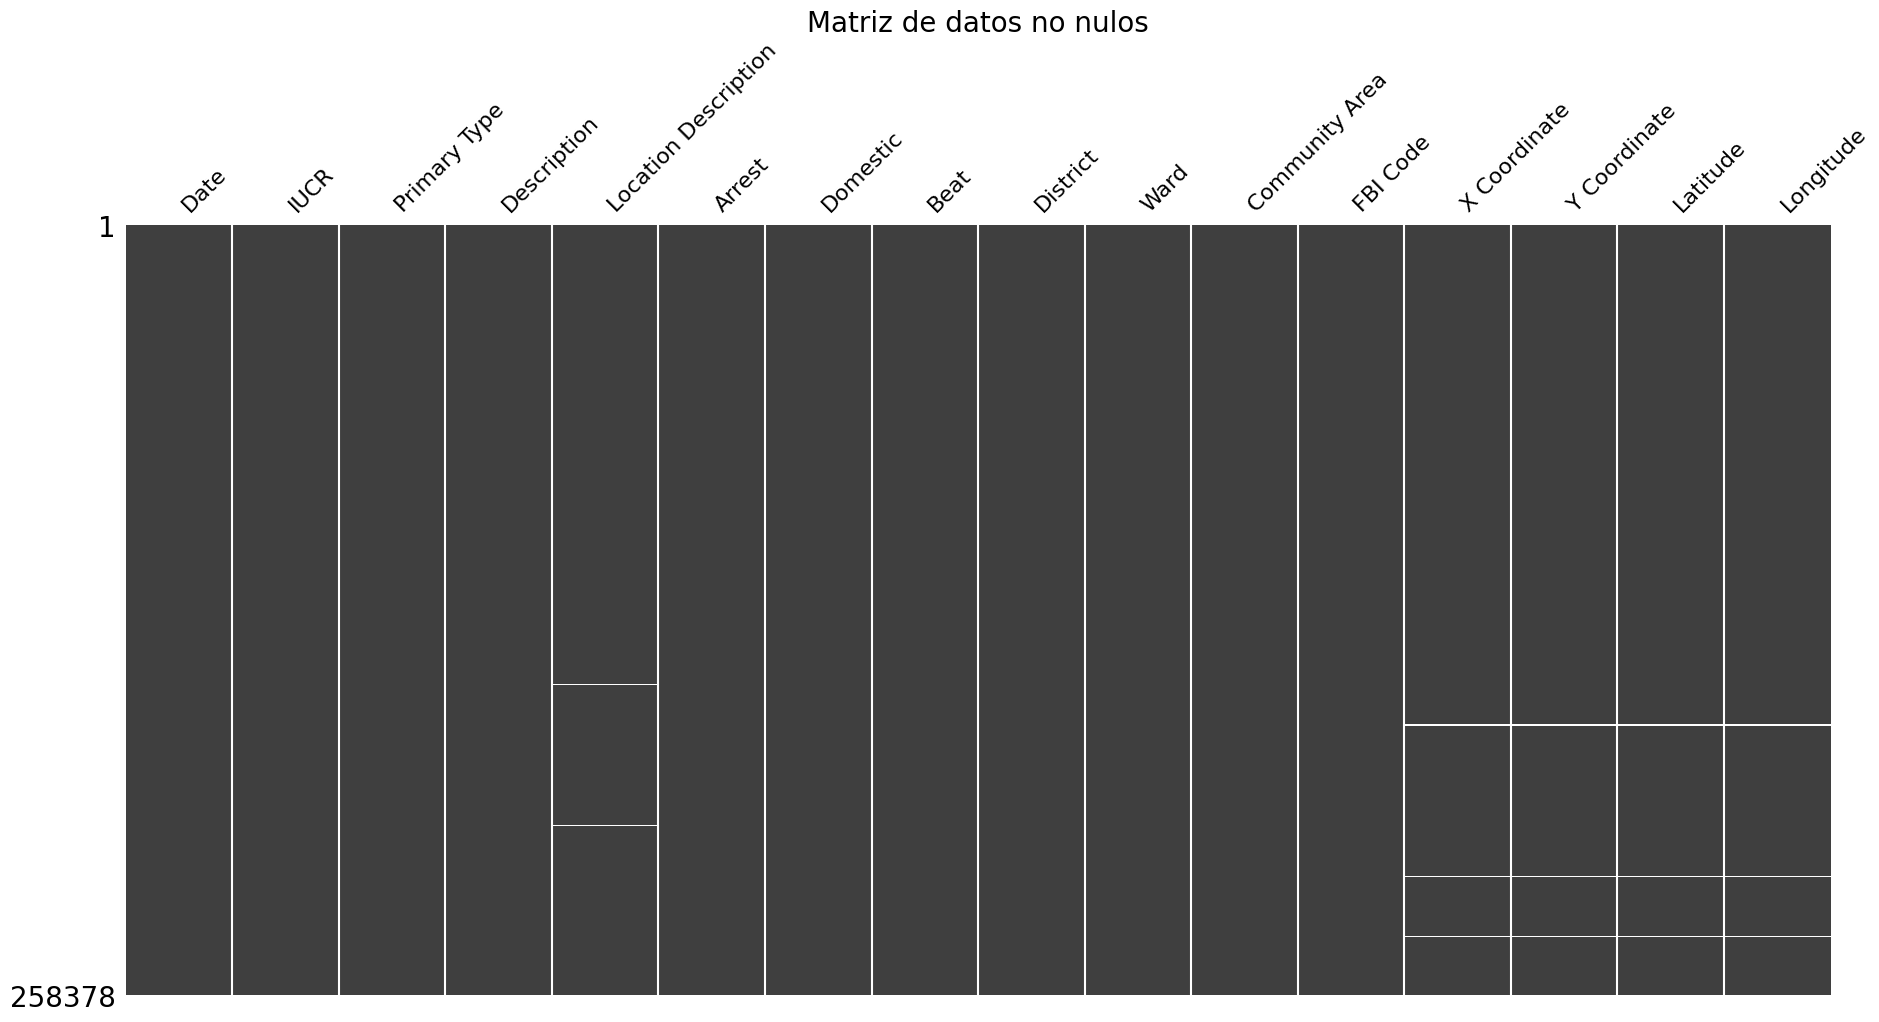

In [276]:
msno.matrix(df, figsize=(22, 10), sparkline=False)
plt.title("Matriz de datos no nulos", fontsize=20)
plt.show()


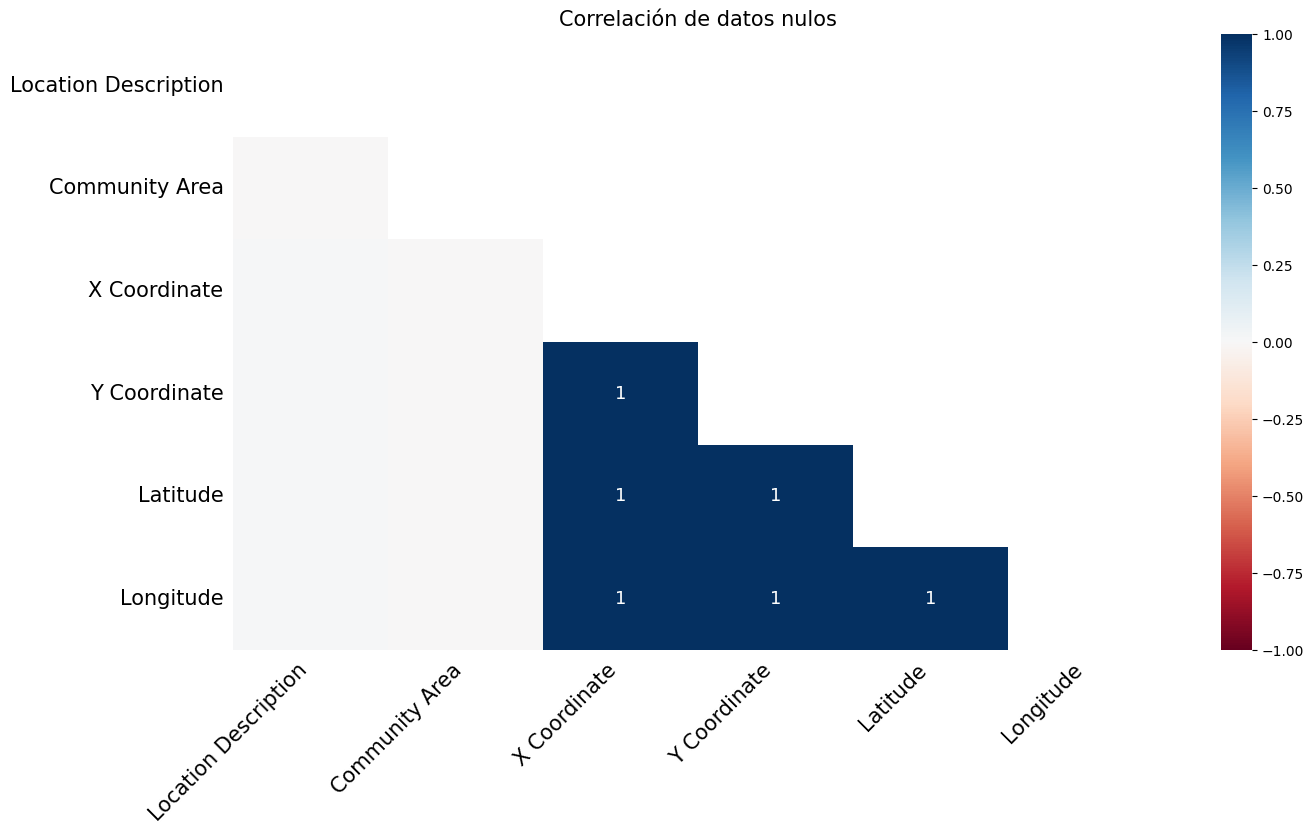

In [277]:
msno.heatmap(df, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

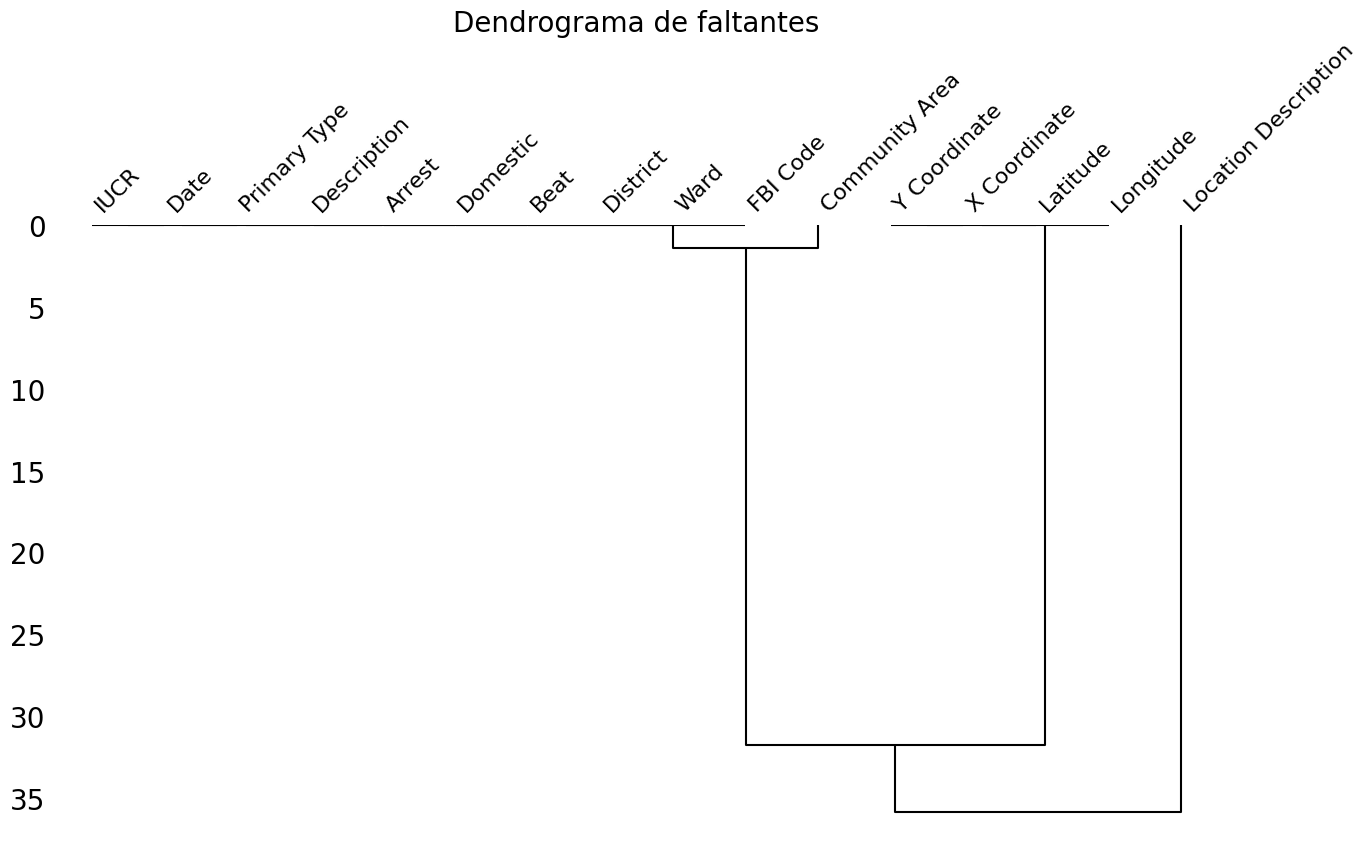

In [278]:
msno.dendrogram(df, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

Podemos ver que hay una gran correlacion entre algunos de los atributos faltantes, los cuales son atributos relacionados entre si, como por ejemplo, el __X Coordinate__ y __Y Coordinate__, o el __Latitude__ y __Longitude__. Para los datos faltantes que se dan en columnas con informacion geografica estamos ante un caso de datos faltantes MAR donde la falta del dato depende de otras variables observadas.

 Una posibilidad es que algunos de estos valores dependan uno del otro para su obtencion. Por ejemplo, el __X Coordinate__ y __Y Coordinate__ se pueden calcular a partir de la __Latitude__ y __Longitude__, y viceversa. Otra posible explicacion es que los datos faltantes se den en los casos donde no se conoce la ubicacion geografica del crimen o fueron omitidos por el autor del reporte.

Para los casos de __Location Description__ y __Community Area__ estamos ante un caso de datos faltantes MCAR donde la falta del dato no depende de otras variables observadas y esta descorrelacionada con las otras variables que poseen datos faltantes.

## Analisis de variables no categoricas

### Distribucion espacial de los crimenes
A partir de las coordenadas geograficas de los crimenes podemos realizar un analisis espacial de los mismos. Para ello, utilizamos la libreria `geopandas`.

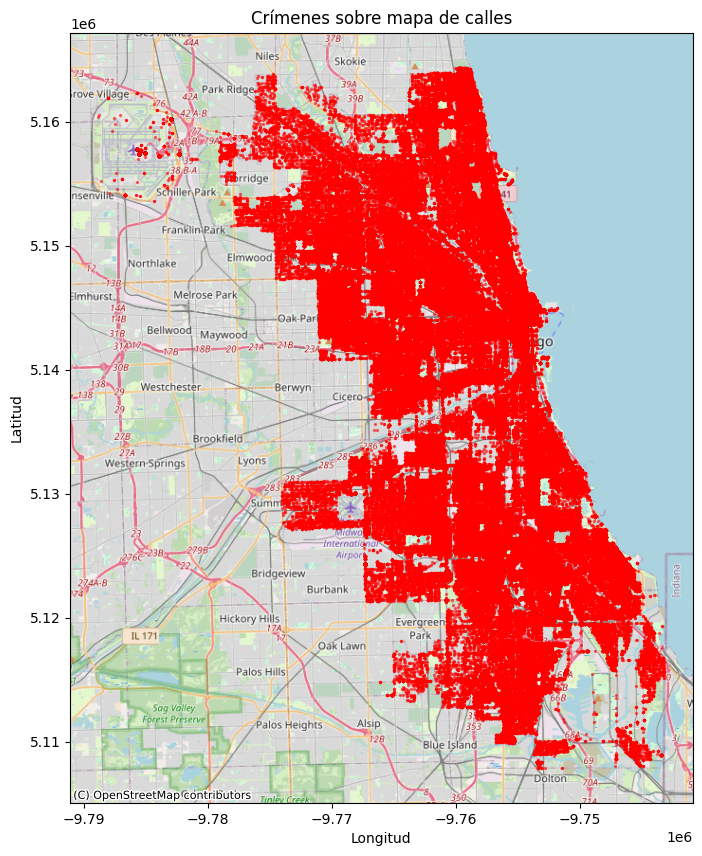

In [232]:
# Eliminamos datos con coordenadas faltantes
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude']) if not pd.isnull(xy[0]) and not pd.isnull(xy[1])]
location_df = df[['Longitude', 'Latitude']].dropna()

# Creamos un GeoDataFrame con los puntos
gdf = gpd.GeoDataFrame(
    location_df,
    geometry=geometry,
    crs="EPSG:4326"
)

# Convertir a proyección web mercator para contextily
gdf = gdf.to_crs(epsg=3857)

# Graficar puntos y agregar mapa base de calles
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=2, alpha=0.5, color='red')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Crímenes sobre mapa de calles')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Es interesante ver como incluso hay crimenes reportados que ocurren en los aeropuertos, tambien se notan "islas" sin crimenes en sectores que parecen ser zonas de parques o sin poblacion. Las columnas __Y Coordinate__ y __X Coordinate__ se excluyen del analisis ya que representan la misma informacion que  __Latitude__ y __Longitude__ pero en otro sistema de coordenadas.

A continuacion vizualizamos distribuciones de crimenes por hora, dia y mes. 

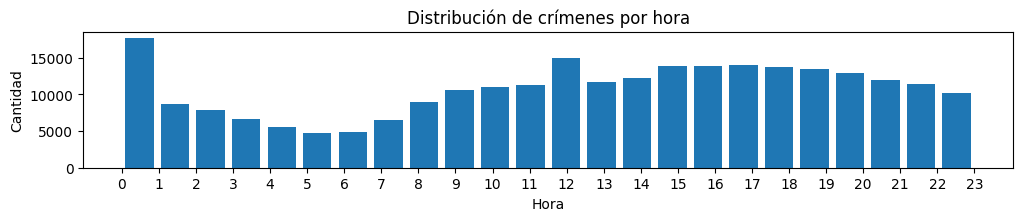

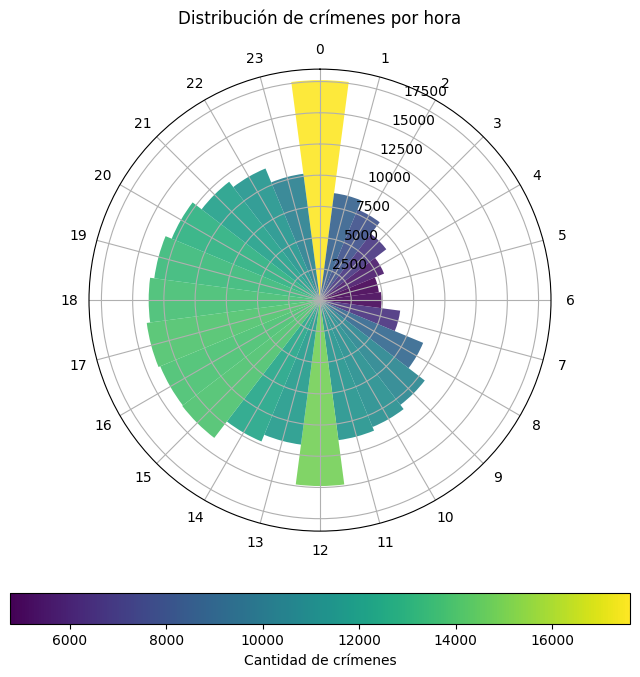

In [265]:
df['Date'] = pd.to_datetime(df['Date'])

df_hour = df['Date'].dt.hour
df_day = df['Date'].dt.day
df_month = df['Date'].dt.month

plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
df_hour.plot(kind='hist', bins=24, rwidth=0.8, figsize=(12, 6))
plt.xticks(range(0, 24))
plt.title('Distribución de crímenes por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.show()

# Grafico crimenes por hora, visualizando sobre un reloj polar.

# Cuenta la cantidad de crímenes por hora
hour_counts = df_hour.value_counts().sort_index()
angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Seteamos intensidad de color proporcional a la cantidad de crímenes
norm = plt.Normalize(hour_counts.min(), hour_counts.max())
colors = plt.cm.viridis(norm(hour_counts.values))

bars = ax.bar(angles, hour_counts, width=2*np.pi/24, color=colors, alpha=0.9)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels(range(24))
ax.set_title('Distribución de crímenes por hora', y=1.08)

# Agrega una barra de color para referencia
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, label='Cantidad de crímenes')
plt.show()

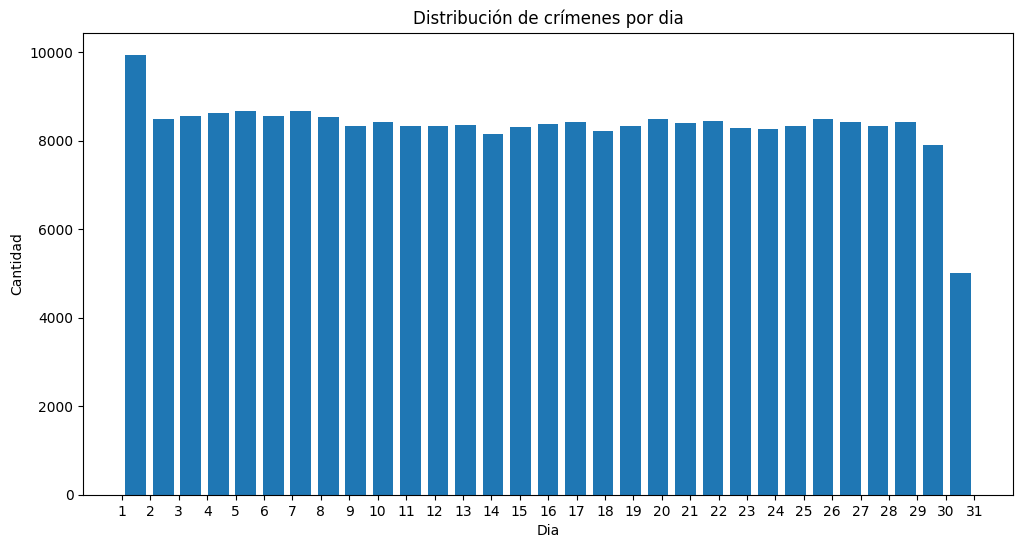

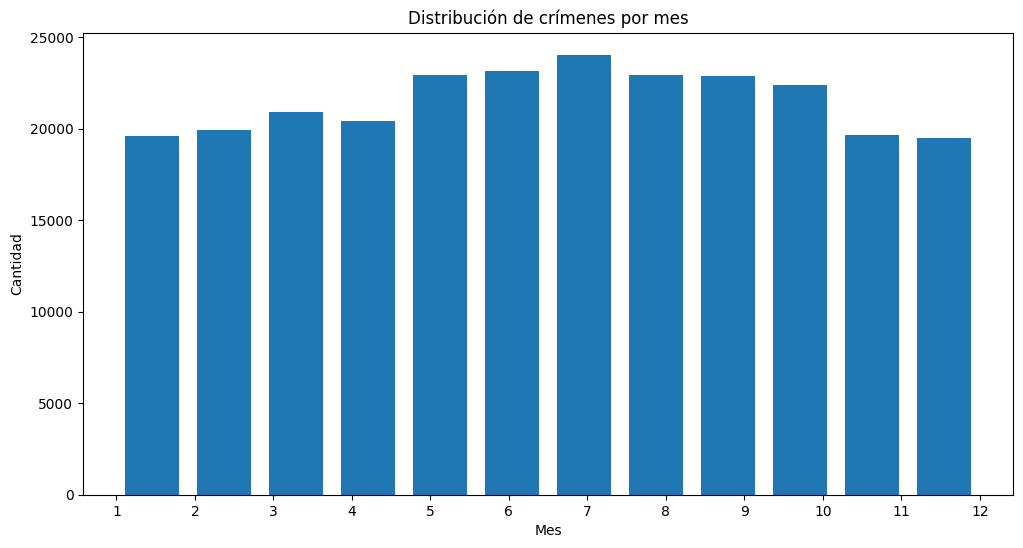

In [266]:
df_day.plot(kind='hist', bins=31, rwidth=0.75, figsize=(12, 6))
plt.xticks(range(1, 32))
plt.title('Distribución de crímenes por dia')
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.show()

df_month.plot(kind='hist', bins=12, rwidth=0.75, figsize=(12, 6))
plt.title('Distribución de crímenes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(range(1, 13))
plt.show()

Para el primer histograma es interesante ver como la distribucion de crimenes es relativamente uniforme durante la tarde, con un pico en torno a la medianoche y una caida abrupta en la cantidad de crimenes reportados durante la madrugada. En la distribucion por dia se observa que la cantidad de crimenes es relativamente uniforme durante el mes, pero con un pico en el dia 1 y una caida abrupta en el dia 31. Sera que algunos crimenes ocurridos en el ultimo dia del mes son cargados al sistema al dia siguiente? 

### Variables categoricas nominales

El dataset posee cuatro variables categoricas nominales que califican el tipo de crimen:

- __Primary Type__
- __Description__
- __IUCR__
- __FBI Code__

Y cuatro variables categoricas nominales relacionadas a la ubicacion del crimen:
- __Location Description__
- __District__
- __Ward__
- __Beat__
>NOTA: Si bien __District__, __Ward__ y __Beat__ son variables numericas no presentan una escala de orden, y el numero es solo un identificador del barrio / distrito policial en donde se reporto el crimen por lo que se consideran variables categoricas.

Tambien tenemos 2 variables categoricas booleanas que indican si se realizo un arresto y si el crimen es de tipo domestico:
- __Arrest__
- __Domestic__

Veamos que categorias contienen cada una de estas variables, si se catalogan en una serie de clases predefinidas o si son descripciones unicas para cada crimen.

In [225]:
cols = [
    'Primary Type', 
    'Description', 
    'Location Description',
    'Ward',
    'Beat',
    'District',
    'IUCR', 
    'FBI Code']
for col in cols:
    print(f'Cantidad de categorías en {col}: {df[col].nunique()} \n')

Cantidad de categorías en Primary Type: 31 

Cantidad de categorías en Description: 318 

Cantidad de categorías en Location Description: 128 

Cantidad de categorías en Ward: 50 

Cantidad de categorías en Beat: 275 

Cantidad de categorías en District: 23 

Cantidad de categorías en IUCR: 340 

Cantidad de categorías en FBI Code: 26 



Se observa que las variables __Description__, __IUCR__, __Beat, y __Location Description__ presentan una alta cardinalidad. A su vez las variable __Primary Type__ y __FBI Code__ presentan una cantidad de categorias mucho menor, lo que las hace mas adecuadas para ser utilizadas en un modelo de machine learning ya que, de la documentacion del dataset, sabemos estas variables estan directamente relacionadas con el tipo de crimen y sintetizan la informacion de las otras variables que caracterizan el crimen.

Veamos como se distribuyen las cantidades de categorias en las variables de baja cardinalidad:


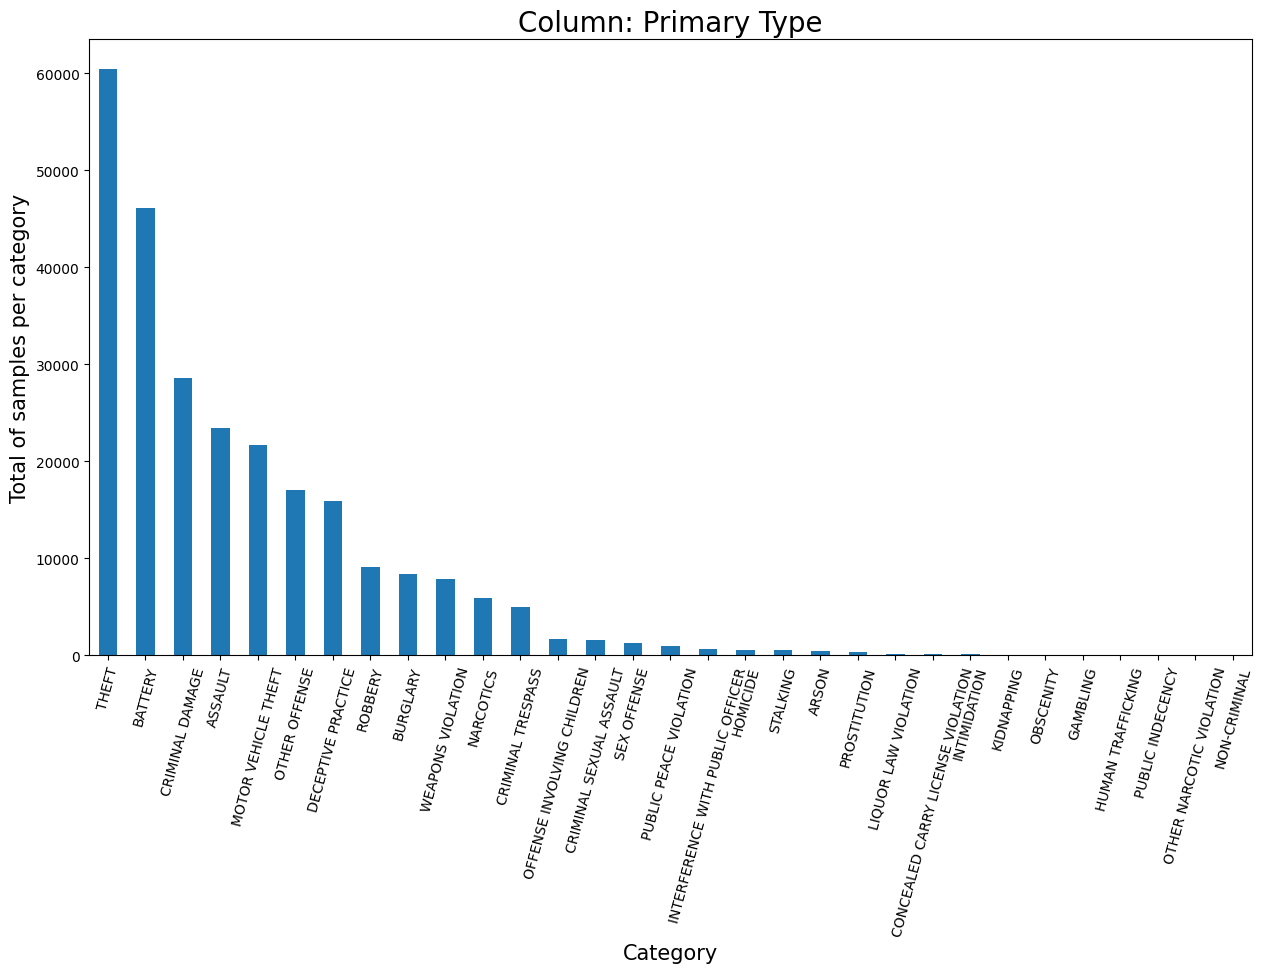

Top 10 values in Primary Type:
Primary Type
THEFT                  60464
BATTERY                46100
CRIMINAL DAMAGE        28549
ASSAULT                23462
MOTOR VEHICLE THEFT    21701
OTHER OFFENSE          17068
DECEPTIVE PRACTICE     15909
ROBBERY                 9121
BURGLARY                8423
WEAPONS VIOLATION       7840
Name: count, dtype: int64

Last 10 values in Primary Type:
Primary Type
LIQUOR LAW VIOLATION                 196
CONCEALED CARRY LICENSE VIOLATION    196
INTIMIDATION                         163
KIDNAPPING                            96
OBSCENITY                             59
GAMBLING                              22
HUMAN TRAFFICKING                     21
PUBLIC INDECENCY                      10
OTHER NARCOTIC VIOLATION               5
NON-CRIMINAL                           3
Name: count, dtype: int64



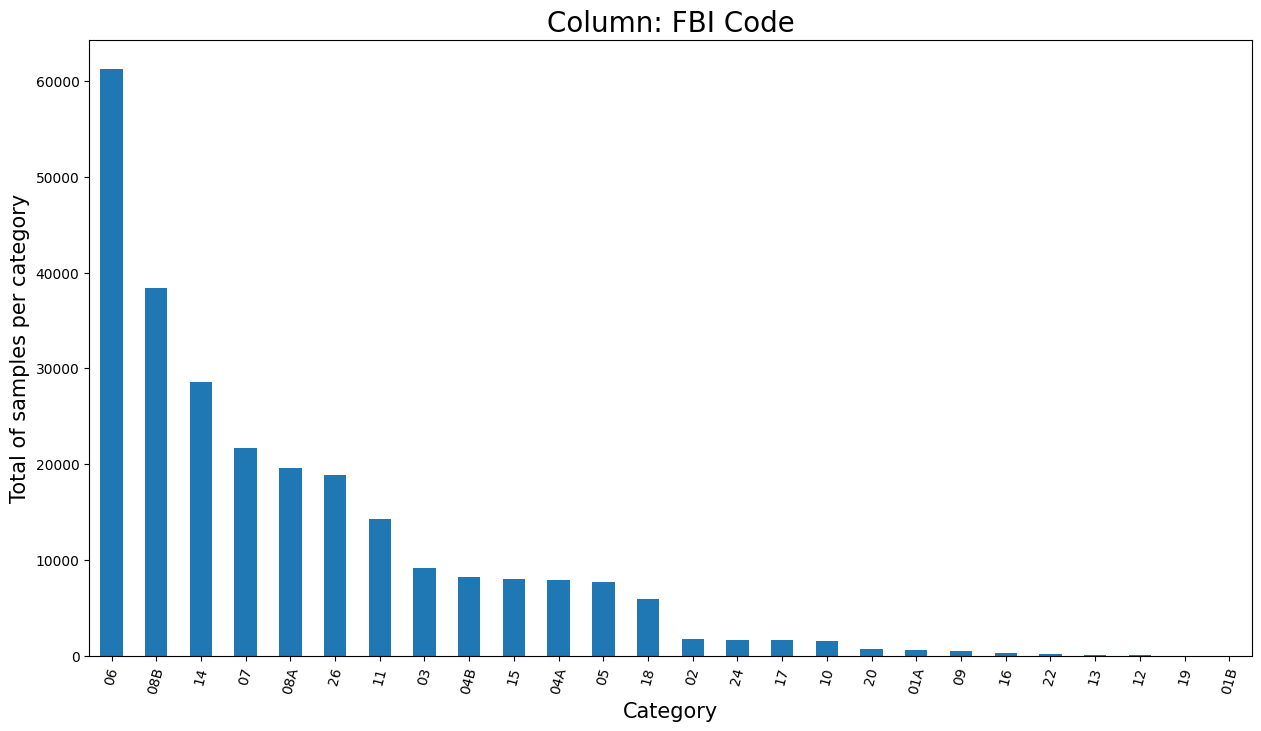

Top 10 values in FBI Code:
FBI Code
06     61237
08B    38342
14     28549
07     21701
08A    19579
26     18905
11     14300
03      9121
04B     8183
15      8039
Name: count, dtype: int64

Last 10 values in FBI Code:
FBI Code
10     1506
20      683
01A     587
09      482
16      307
22      196
13       64
12       35
19       22
01B       2
Name: count, dtype: int64



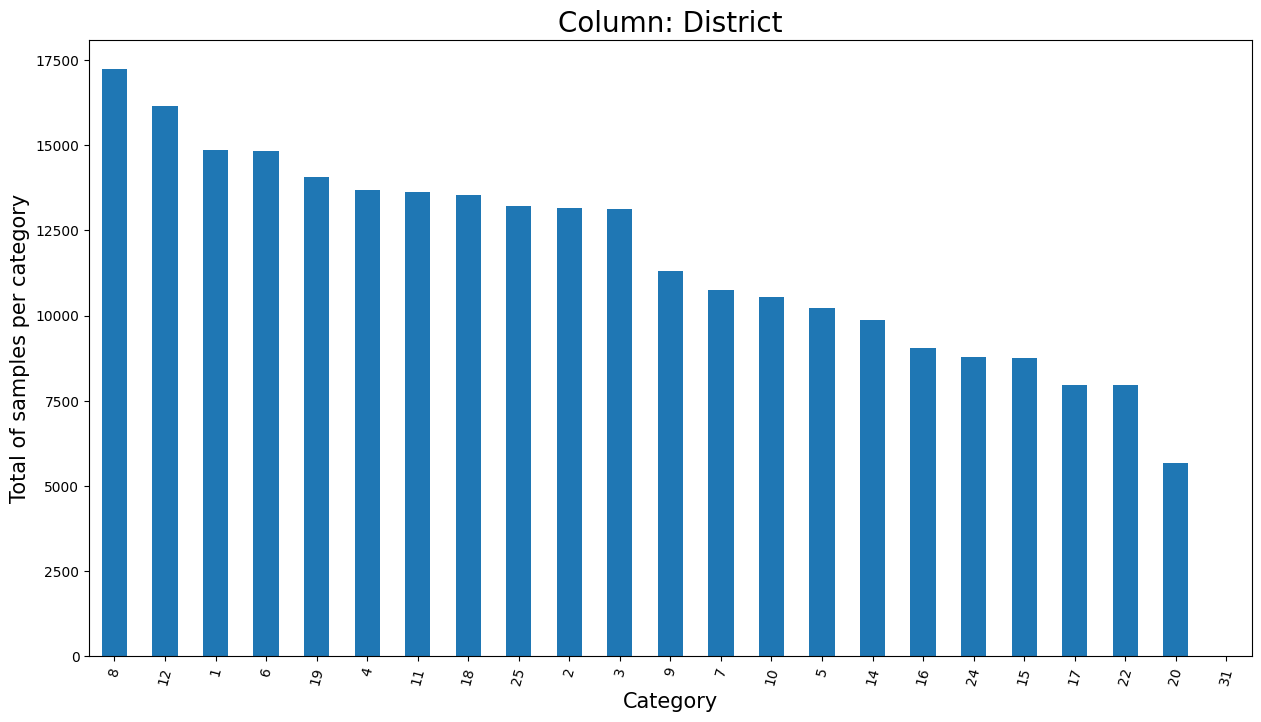

Top 10 values in District:
District
8     17234
12    16153
1     14867
6     14824
19    14080
4     13674
11    13632
18    13535
25    13229
2     13149
Name: count, dtype: int64

Last 10 values in District:
District
10    10532
5     10223
14     9874
16     9052
24     8787
15     8752
17     7973
22     7953
20     5661
31       13
Name: count, dtype: int64



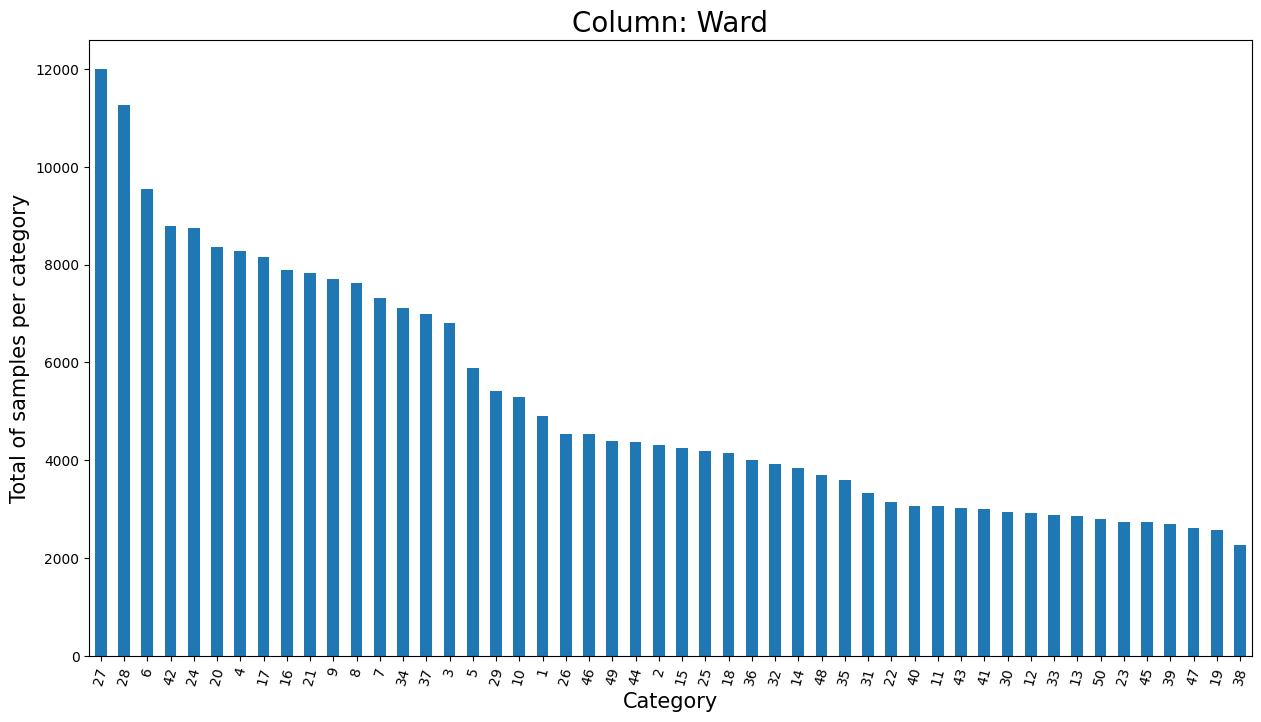

Top 10 values in Ward:
Ward
27    11991
28    11266
6      9552
42     8795
24     8757
20     8367
4      8269
17     8155
16     7881
21     7828
Name: count, dtype: int64

Last 10 values in Ward:
Ward
12    2916
33    2877
13    2855
50    2794
23    2741
45    2738
39    2699
47    2620
19    2575
38    2261
Name: count, dtype: int64



In [233]:
def describe_ordinal_variables(
        column_name: str, 
        df: pd.DataFrame,
        show_all: bool = True, 
        show_top_10: bool = False,
        show_last_10: bool = False
):
    if show_all:
        df[column_name].value_counts().plot(kind='bar', figsize=(15, 8))
        plt.title(f'Column: {column_name}', fontsize=20)
        plt.xlabel('Category', fontsize=15)
        plt.ylabel('Total of samples per category', fontsize=15)
        plt.xticks(rotation=75)
        plt.show()

    if show_top_10:
        top_10 = df[column_name].value_counts().head(10)
        print(f'Top 10 values in {column_name}:\n{top_10}\n')
    if show_last_10:
        last_10 = df[column_name].value_counts().tail(10)
        print(f'Last 10 values in {column_name}:\n{last_10}\n')

# Show low cardinality values for each column
for col in ['Primary Type', 'FBI Code', 'District', 'Ward']:
    describe_ordinal_variables(col, df, show_top_10=True, show_last_10=True)

Para interpretar los codigos de las variables __FBI Code__ debemos consultar: https://ucr.fbi.gov/nibrs/2011/resources/nibrs-offense-codes. Extracto de la documentacion del FBI:
![./images/fbi_codes.png](./images/fbi_codes.png)

Para visualizar las categorias de las variables de alta cardinalidad mostramos solo el Top N y el Bottom N debido a que la cantidad de categorias es muy grande y no se puede visualizar de manera efectiva en un grafico. 

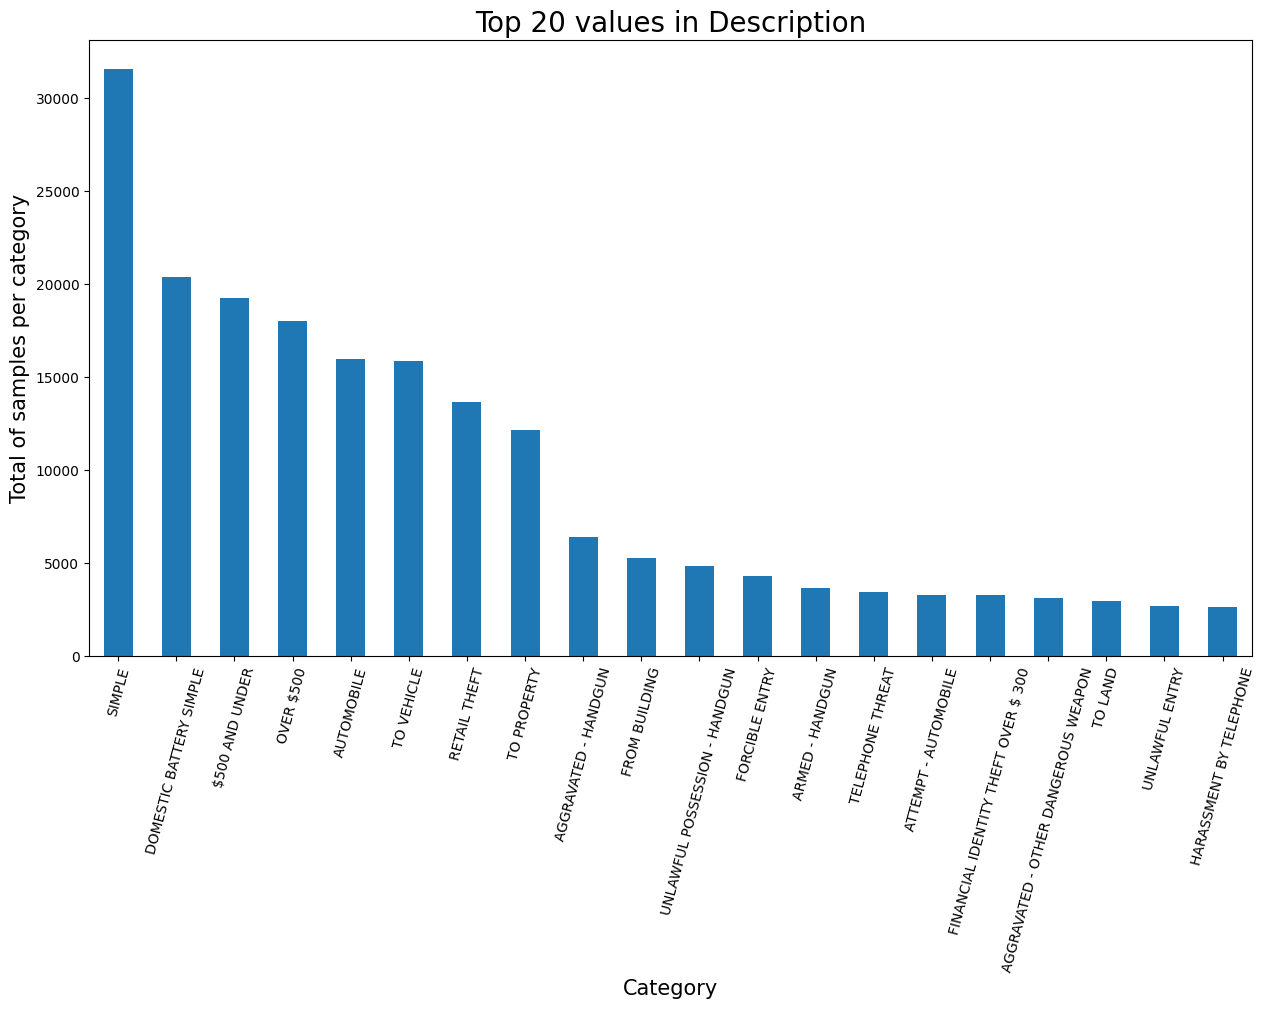

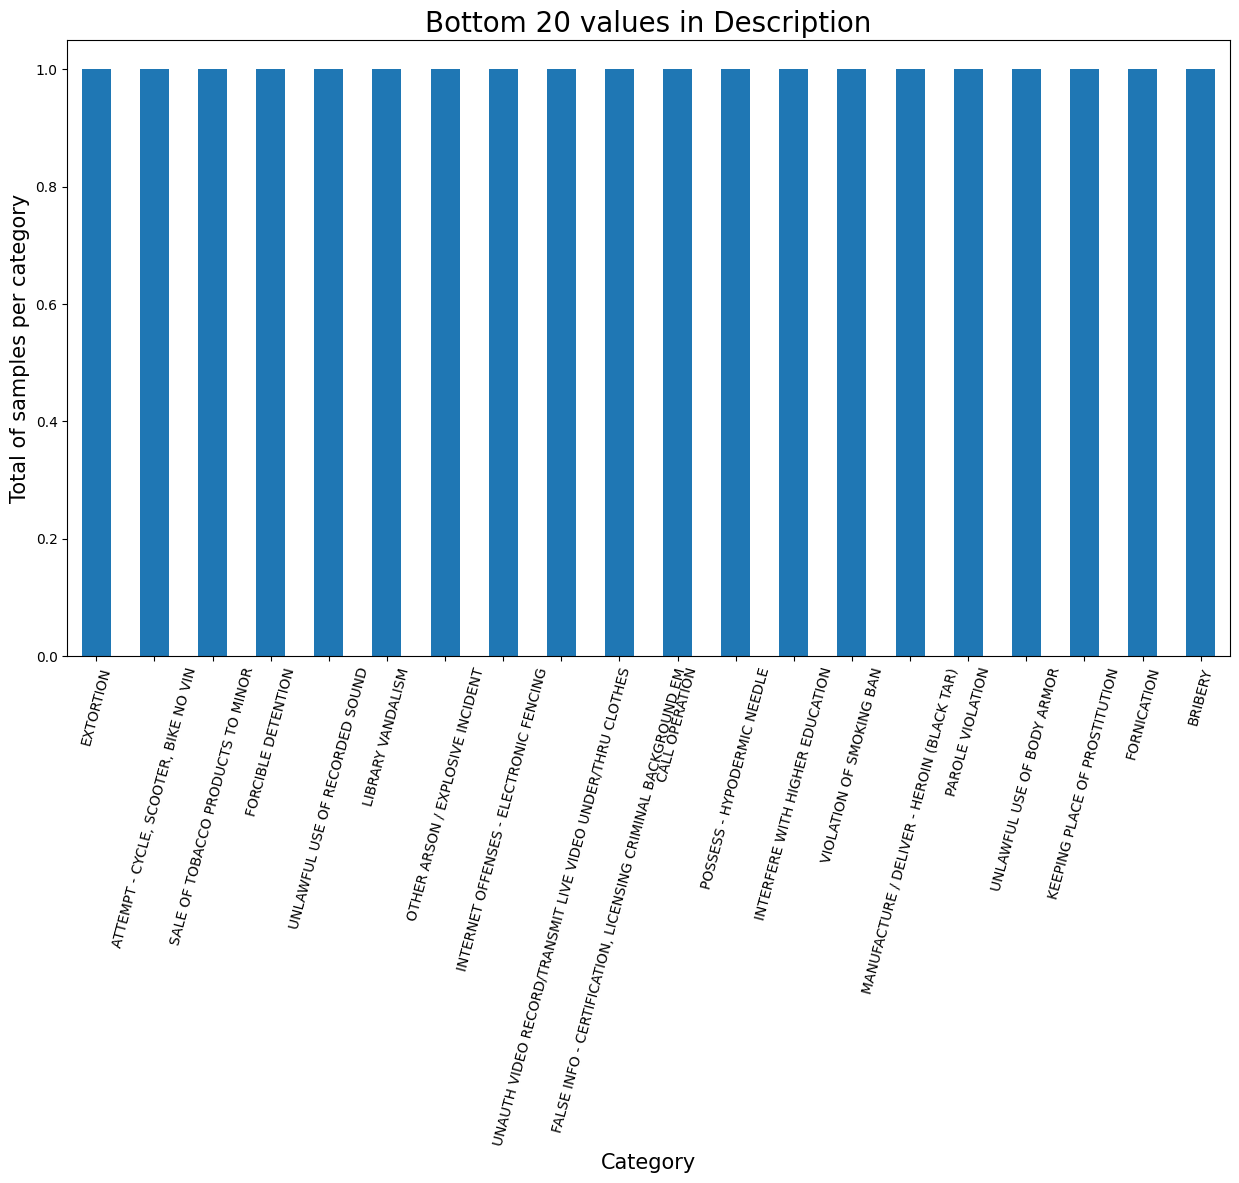

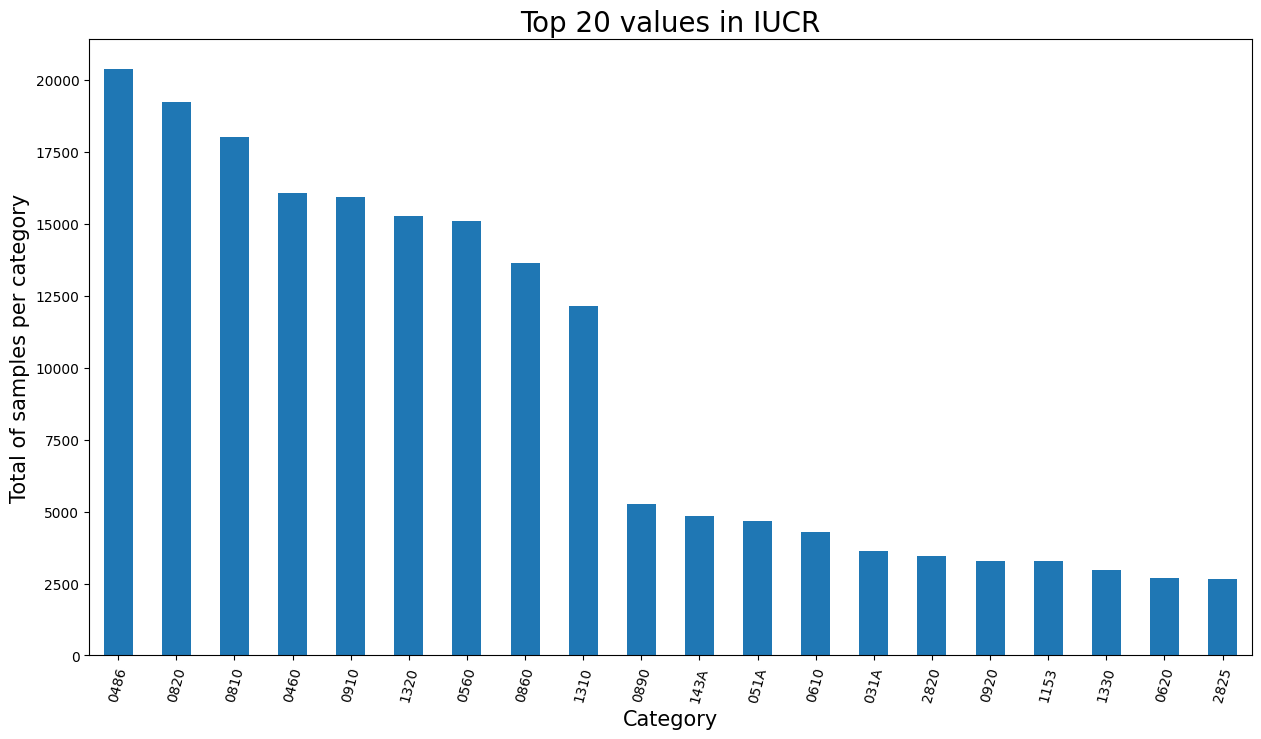

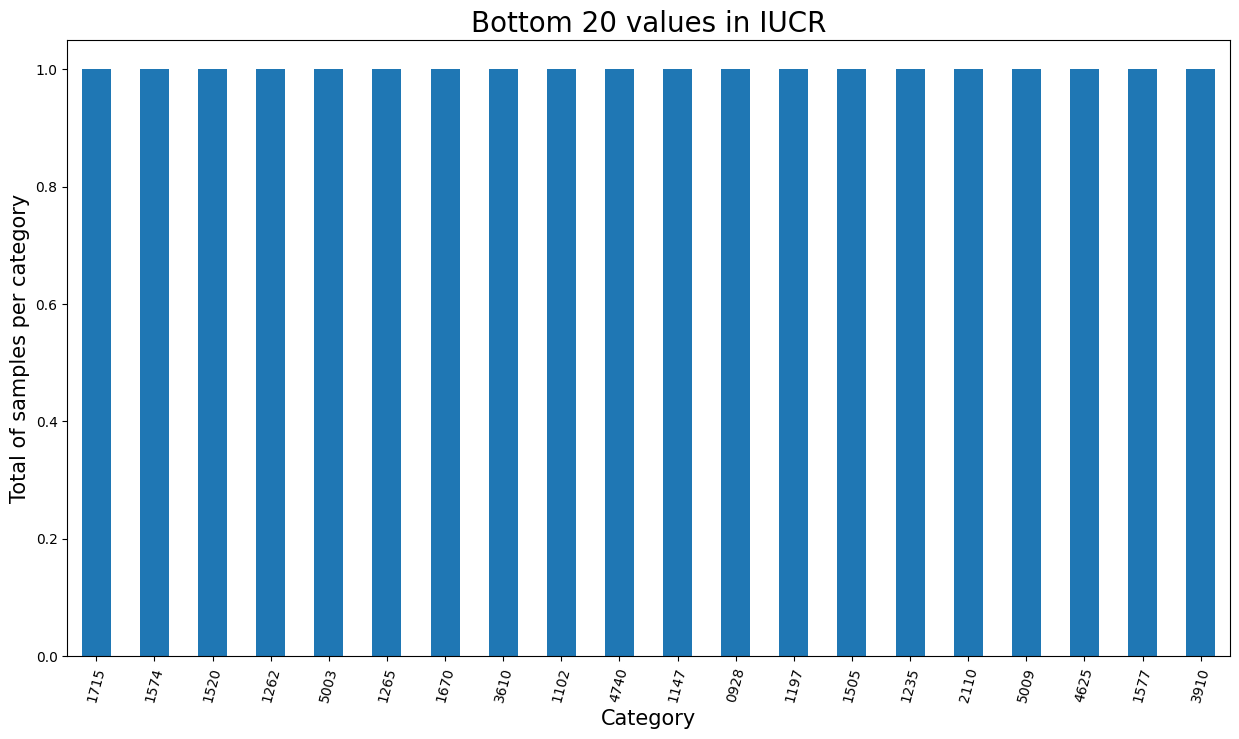

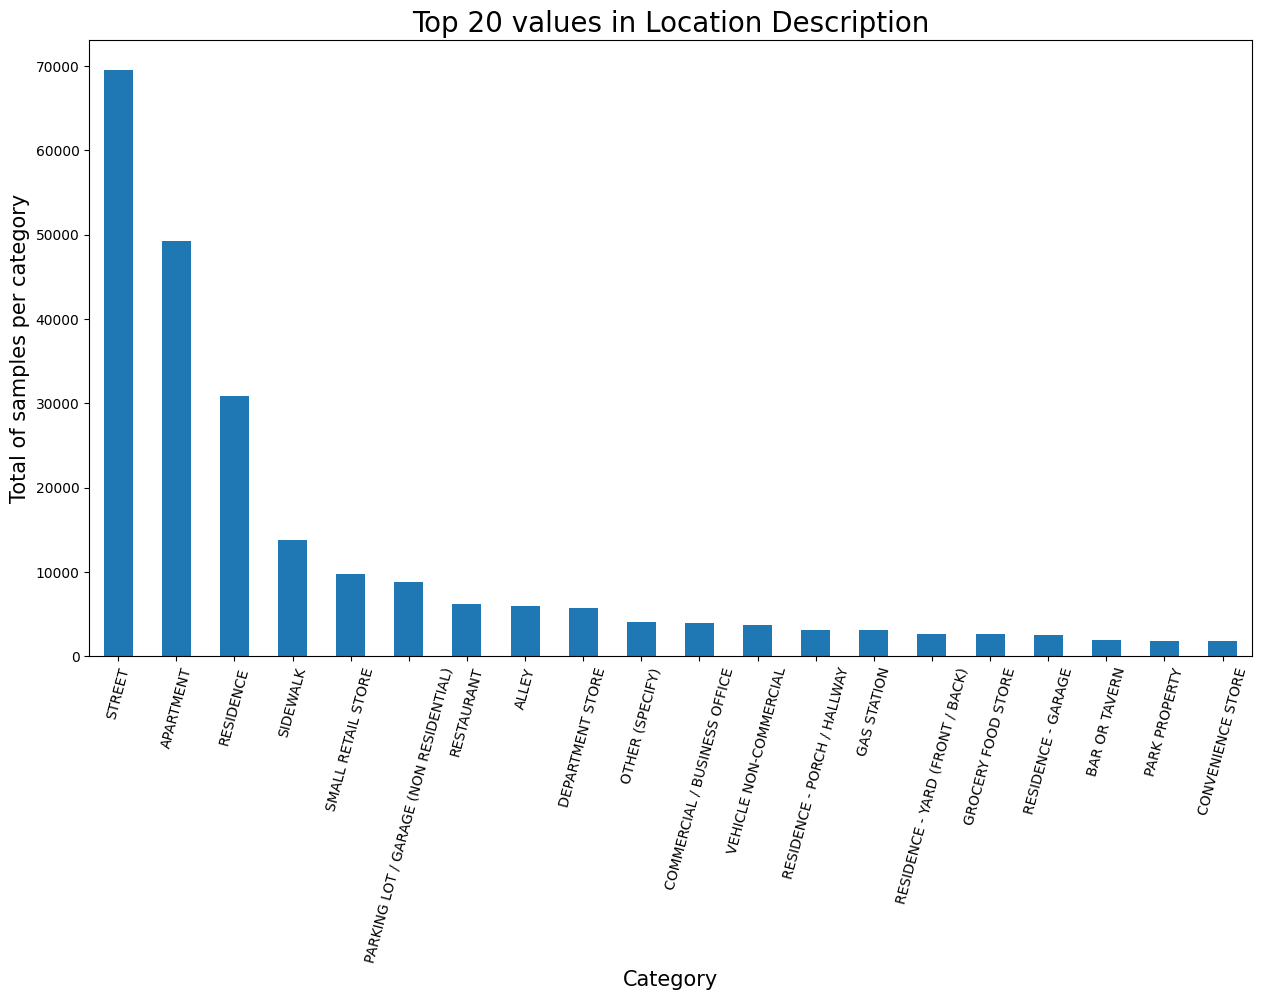

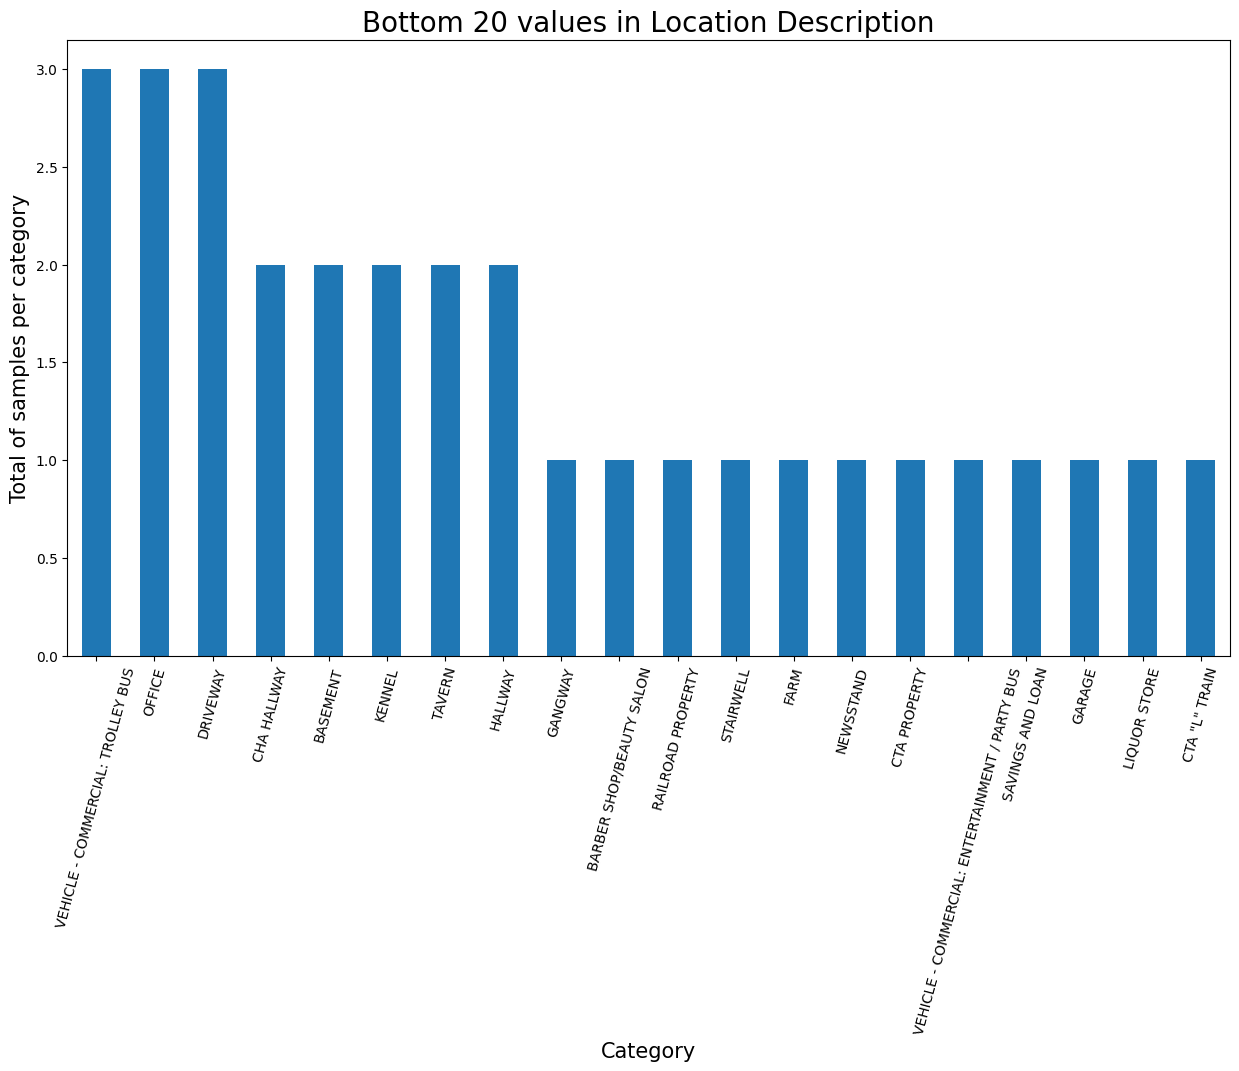

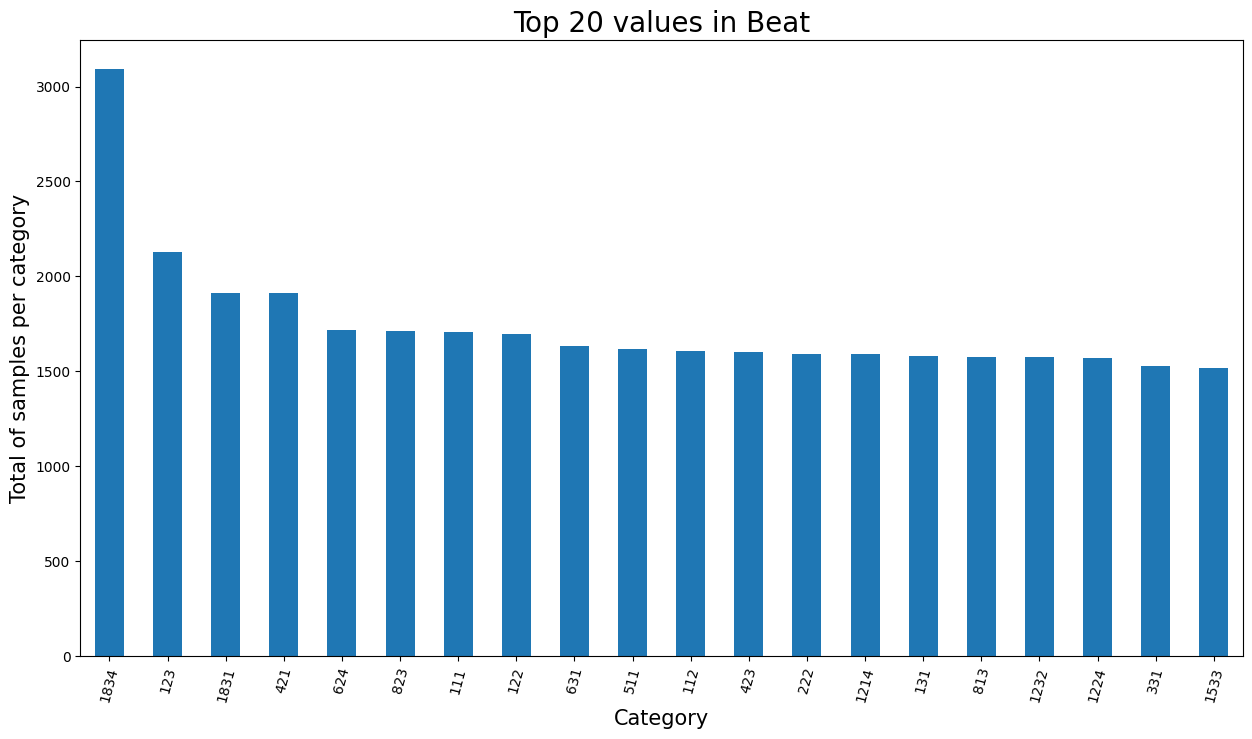

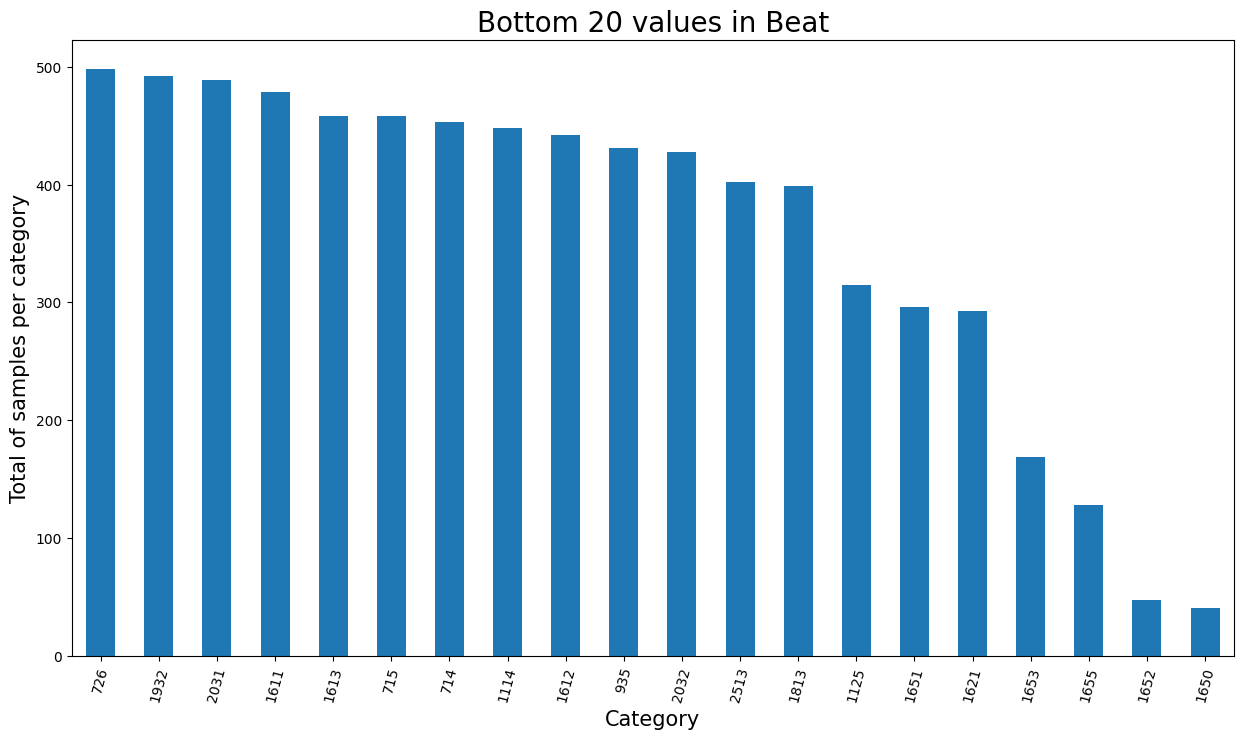

In [234]:
n_show = 20

for col in ['Description', 'IUCR', 'Location Description', 'Beat']:
    df[col].value_counts().head(n_show).plot(kind='bar', figsize=(15, 8))
    plt.title(f'Top {n_show} values in {col}', fontsize=20)
    plt.xlabel('Category', fontsize=15)
    plt.ylabel('Total of samples per category', fontsize=15)
    plt.xticks(rotation=75)
    plt.show()

    df[col].value_counts().tail(n_show).plot(kind='bar', figsize=(15, 8))
    plt.title(f'Bottom {n_show} values in {col}', fontsize=20)
    plt.xlabel('Category', fontsize=15)
    plt.ylabel('Total of samples per category', fontsize=15)
    plt.xticks(rotation=75)
    plt.show()


Tanto para la categoria de __Description__ como para __IUCR__ podemos ver que hay una gran cantidad de categorias que no se repiten en el dataset, lo que indica que son descripciones unicas para cada crimen. Esto puede ser un problema para un modelo de machine learning y se deberia considerar agrupar estas categorias en clases predefinidas para reducir la cardinalidad. Algo similar pero en menor medida ocurre con la variable __Location Description__.
>NOTA: Los valores que adopta la variable __IUCR__ son codigos que caracterizan el tipo de crimen, al igual que __FBI Code__, pero son mas especificos con una cardinalidad mucho mayor. Se recomienda utilizar __FBI Code__ como caracterizador del tipo de crimen. El detalle de los codigos de la variable __IUCR__ se puede consultar en https://catalog.data.gov/dataset/chicago-police-department-illinois-uniform-crime-reporting-iucr-codes

Para las variables booleanas analizamos la distribucion de los valores True/False y la proporcion de arrestos por tipo de crimen.

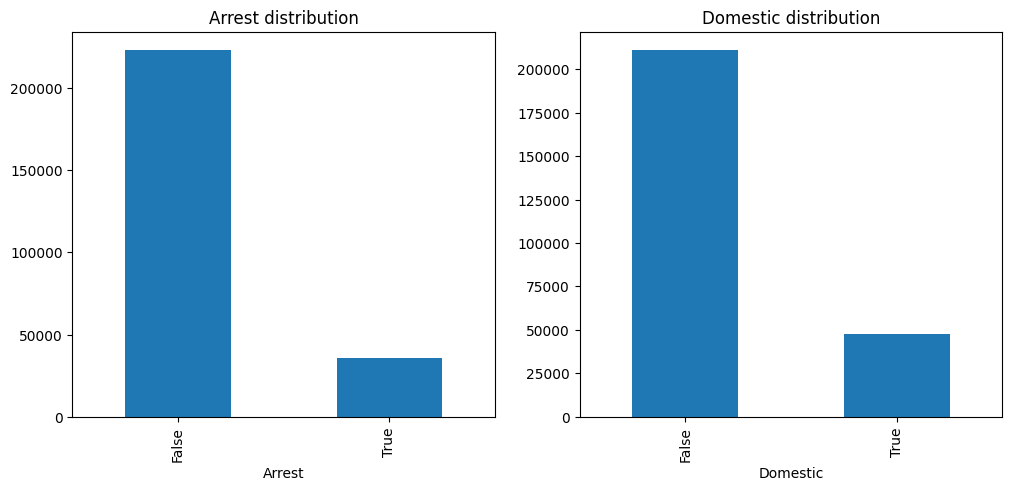

In [228]:
for i, col in enumerate(['Arrest', 'Domestic'], start=1):
    plt.subplot(1, 2, i)
    df[col].value_counts().plot(kind='bar', figsize=(12, 5))
    plt.title(f'{col} distribution')
plt.show()

Algo que puede ser de interes es analizar la proporcion de arrestos por tipo de crimen. Para ello, agrupamos los datos por la variable __Primary Type__ y calculamos la media de la variable __Arrest__. Esto nos da una idea de que tan probable es que se realice un arresto dada una categoria de crimen.

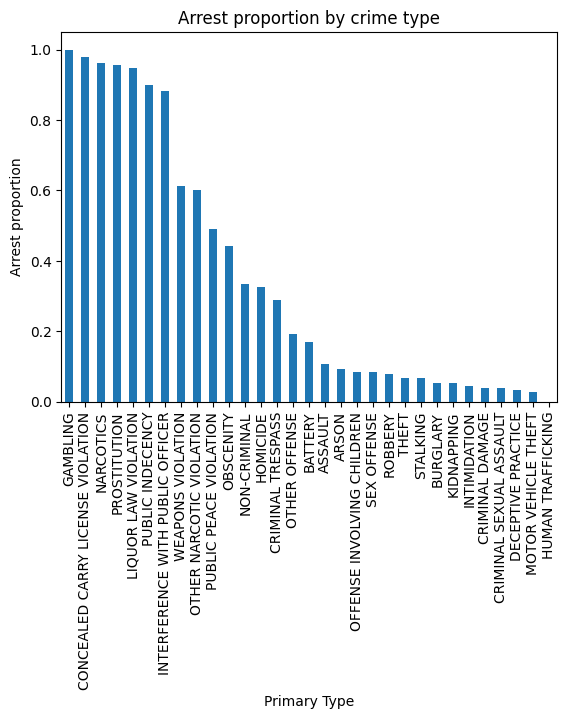

In [229]:
df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Arrest proportion by crime type')
plt.ylabel('Arrest proportion')
plt.show()

## Analisis de outliers

En este dataset no hay muchos datos que puedan considerarse outliers en el sentido tradicional de valores extremos o atipicos ya que las unicas variables nominales a analizar son latitud, longitud y fechas. 

In [267]:
# Coordenadas fuera de rango
outliers = df[
    (df['Latitude'] < -90) | (df['Latitude'] > 90) |
    (df['Longitude'] < -180) | (df['Longitude'] > 180)
]
print(outliers)

# Chequeamos rango de fechas
print(df['Date'].min(), df['Date'].max())

Empty DataFrame
Columns: [Date, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, Latitude, Longitude]
Index: []
2024-01-01 00:00:00 2024-12-31 23:58:00


Tanto las fechas como las coordenadas geograficas estan dentro del rango esperado documentado por el dataset.